In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
def plot_line_chart(data, xlabel, ylabel, x_lowerlim, x_upperlim, plot_name):
    plt.figure(figsize=(10,10))
    plt.plot(data, 'bx-')
    plt.xlim(x_lowerlim, x_upperlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(plot_name)
    plt.grid(True)
    plt.show()

In [3]:
def optimal_cluster_analysis(X, n_clusters, cluster_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    # 1st plot - silhoutte analysis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot - showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

# Read the dataset and understand the features and target variable.

In [4]:
Bankruptcy_data=pd.read_csv('Qualitative_Bankruptcy.data.txt')

In [5]:
Bankruptcy_data.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [6]:
Bankruptcy_data_na = [var for var in Bankruptcy_data.columns if Bankruptcy_data[var].isnull().mean() > 0] ## To check the data contains null value or not

In [7]:
Bankruptcy_data_na

[]

In [8]:
Bankruptcy_data.dtypes

P      object
P.1    object
A      object
A.1    object
A.2    object
P.2    object
NB     object
dtype: object

## Encode independent features. 

In [9]:
Bankruptcy_data['P'] = pd.Categorical(Bankruptcy_data['P'])
Bankruptcy_data['P.1'] = pd.Categorical(Bankruptcy_data['P.1'])
Bankruptcy_data['A'] = pd.Categorical(Bankruptcy_data['A'])
Bankruptcy_data['A.1'] = pd.Categorical(Bankruptcy_data['A.1'])
Bankruptcy_data['A.2'] = pd.Categorical(Bankruptcy_data['A.1'])
Bankruptcy_data['P.2'] = pd.Categorical(Bankruptcy_data['P.2'])

In [10]:
dummies1 = pd.get_dummies(Bankruptcy_data[['P']], prefix = 'P',  drop_first=True)
dummies2 = pd.get_dummies(Bankruptcy_data[['P.1']], prefix = 'P.1',  drop_first=True)
dummies3 = pd.get_dummies(Bankruptcy_data[['A']], prefix = 'A',  drop_first=True)
dummies4 = pd.get_dummies(Bankruptcy_data[['A.1']], prefix = 'A.1',  drop_first=True)
dummies5 = pd.get_dummies(Bankruptcy_data[['A.2']], prefix = 'A.2',  drop_first=True)
dummies6 = pd.get_dummies(Bankruptcy_data[['P.2']], prefix = 'P.2',  drop_first=True)

In [11]:
dummies=pd.concat([dummies1,dummies2,dummies3,dummies4,dummies5,dummies6],axis=1)

## Separate the dependant variable from the rest of the train data and splitting the data into training and test set .

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    dummies[['P_N','P_P','P.1_N','P.1_P','A_N','A_P','A.1_N','A.1_P','A.2_N','A.2_P','P.2_N','P.2_P' ]],  # predictors
    Bankruptcy_data['NB'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

## Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test) 

In [14]:
X_train_std

array([[ 1.2858201 , -0.67272189,  0.99498744, ..., -0.67272189,
         1.03581691, -0.62578622],
       [-0.77771377, -0.67272189, -1.00503782, ...,  1.48649838,
        -0.96542158, -0.62578622],
       [ 1.2858201 , -0.67272189, -1.00503782, ..., -0.67272189,
        -0.96542158,  1.59798981],
       ...,
       [-0.77771377,  1.48649838, -1.00503782, ...,  1.48649838,
        -0.96542158,  1.59798981],
       [-0.77771377, -0.67272189,  0.99498744, ..., -0.67272189,
        -0.96542158,  1.59798981],
       [-0.77771377, -0.67272189,  0.99498744, ..., -0.67272189,
         1.03581691, -0.62578622]])

## Apply PCA on the independent features of train data.

In [15]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_train_std)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2388.000000
1,2,1713.461732
2,3,1435.761104
3,4,1273.070161
4,5,1157.822599
5,6,1046.810197
6,7,998.885400
7,8,939.032158
8,9,860.798440
9,10,807.975578


## Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance).

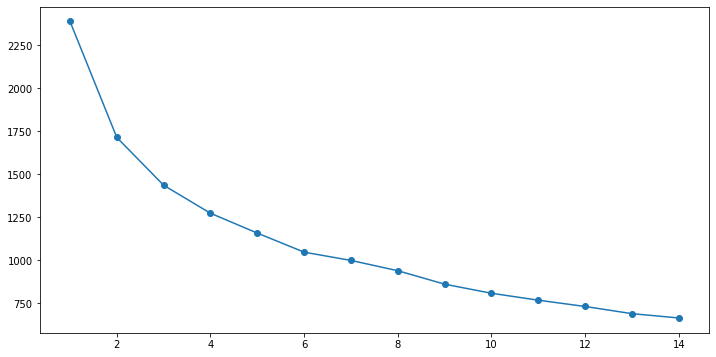

In [16]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Transform the data using PCA ( select optimum number of PCs).

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)  
X_train_std_pc = pca.fit_transform(X_train_std) 
  
explained_variance = pca.explained_variance_ratio_ 

In [18]:
X_train_std_pc

array([[-0.47826574,  1.7302665 ,  1.30562933,  0.64759478],
       [ 2.15087133,  0.80439091, -0.51441539, -0.3343341 ],
       [-1.62222137, -0.35261395, -2.31422292, -0.0117489 ],
       [-0.47826574,  1.7302665 ,  1.30562933,  0.64759478],
       [ 1.65654456, -2.31370866,  0.33138374,  2.01993368],
       [ 3.31086233, -1.35008381, -1.28895924, -0.85764209],
       [-2.2288253 , -0.67522817,  0.10237243, -1.28043406],
       [-0.83302495,  1.532679  , -0.49348239,  0.8365454 ],
       [-2.91547526,  1.11968318,  0.07861443, -0.34293856],
       [-2.70951632,  0.01487851,  0.14818157, -0.35614148],
       [ 1.33203142, -0.05542688, -0.15861051,  1.75626107],
       [ 2.15087133,  0.80439091, -0.51441539, -0.3343341 ],
       [ 2.15087133,  0.80439091, -0.51441539, -0.3343341 ],
       [ 3.82790559, -1.66348005, -0.36036174, -0.08016547],
       [ 2.49829946, -0.56789336,  1.05806897, -2.11312433],
       [ 0.58805658,  0.58658099,  1.21855822, -1.62527213],
       [-2.91547526,  1.

## Apply KMeans algorithm on the above transformed data.

For n_clusters = 2 The average silhouette_score is : 0.350563547411328


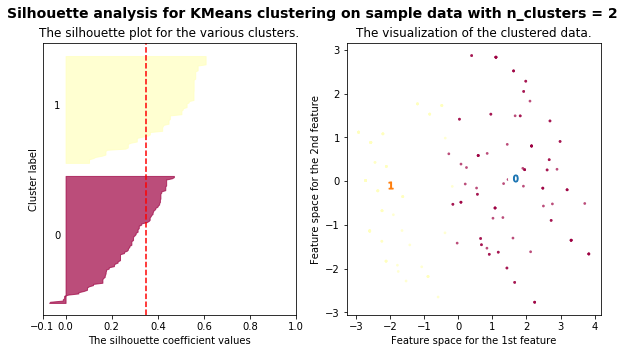

For n_clusters = 3 The average silhouette_score is : 0.31901589180643364


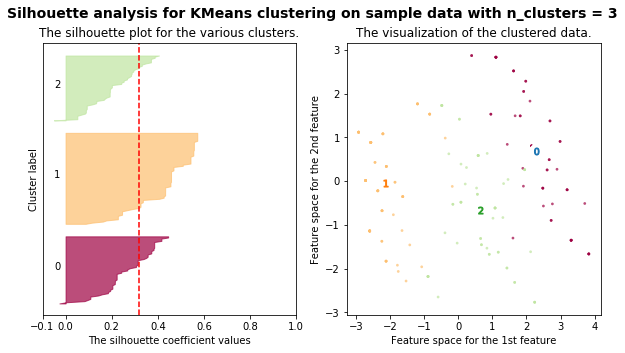

For n_clusters = 4 The average silhouette_score is : 0.33578963907640613


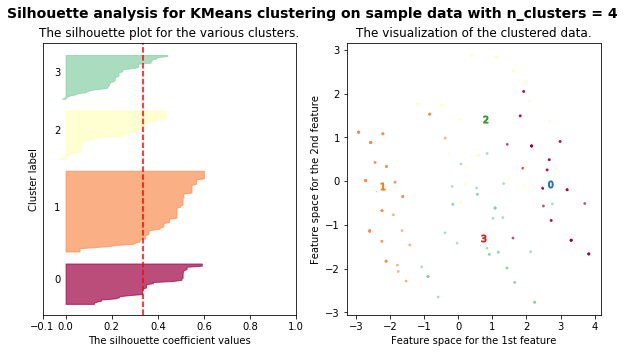

For n_clusters = 5 The average silhouette_score is : 0.3135246151245053


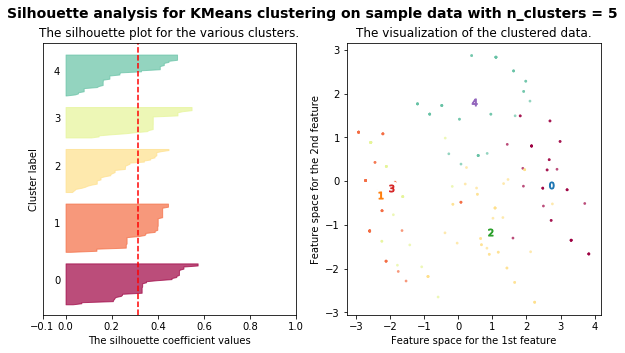

For n_clusters = 6 The average silhouette_score is : 0.32204249125595424


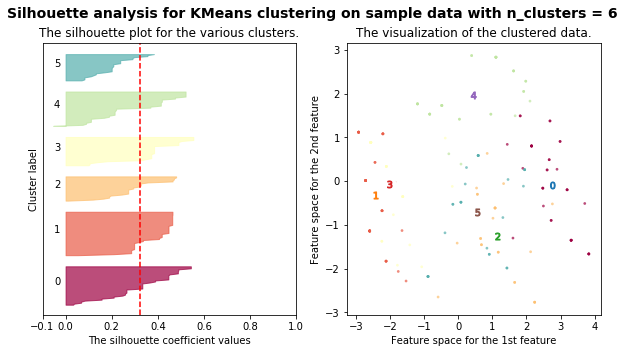

For n_clusters = 7 The average silhouette_score is : 0.335436823208171


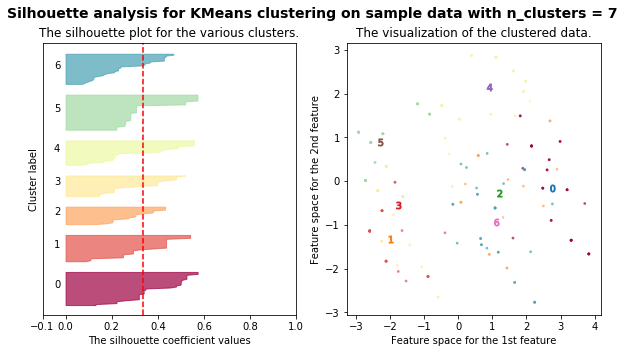

For n_clusters = 8 The average silhouette_score is : 0.3190864614541974


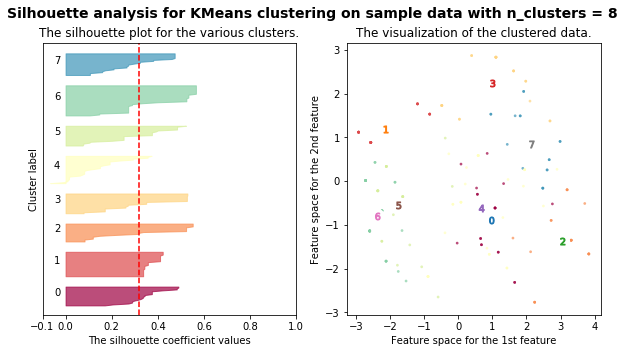

For n_clusters = 9 The average silhouette_score is : 0.3300486517355998


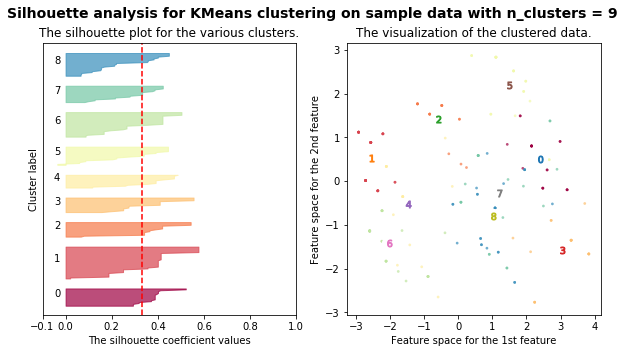

For n_clusters = 10 The average silhouette_score is : 0.3451162187632691


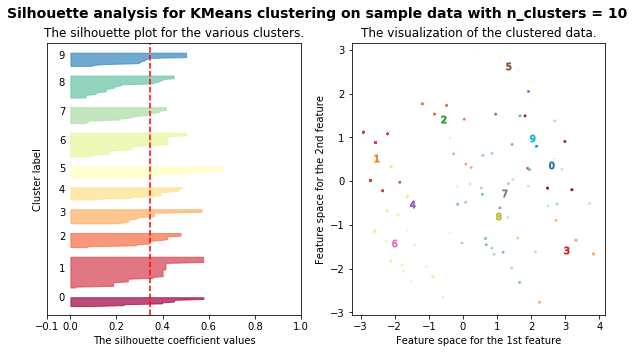

For n_clusters = 11 The average silhouette_score is : 0.3405540320211219


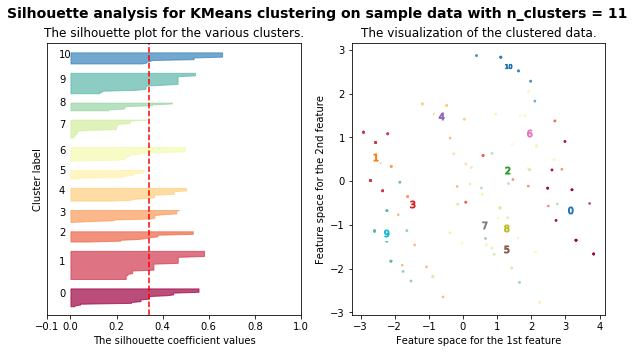

For n_clusters = 12 The average silhouette_score is : 0.3520548514907897


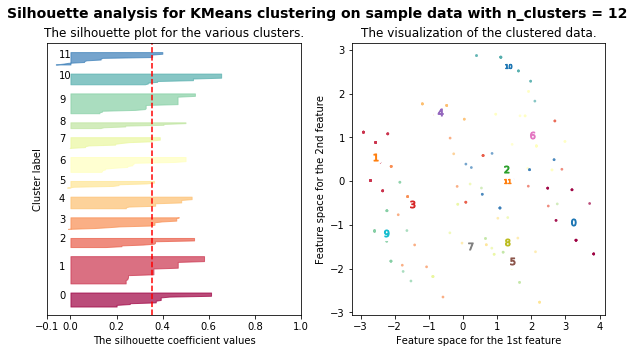

For n_clusters = 13 The average silhouette_score is : 0.35132653814344095


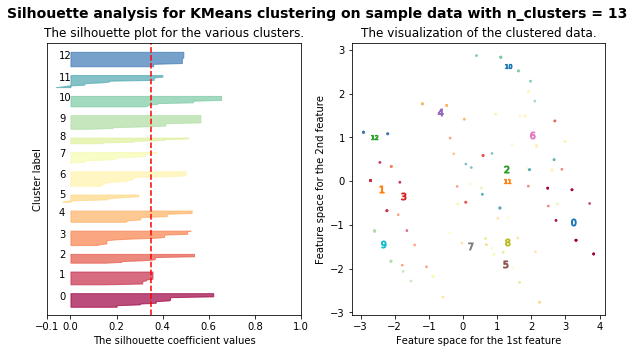

For n_clusters = 14 The average silhouette_score is : 0.3706545153769274


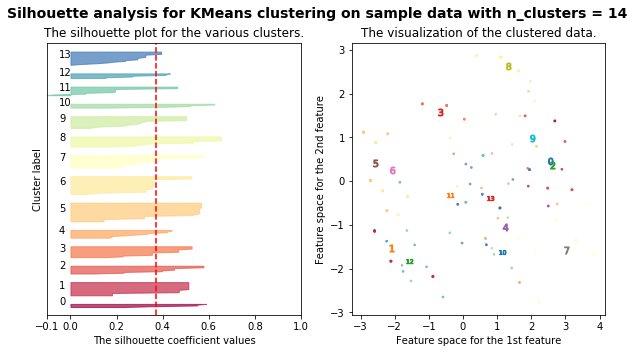

For n_clusters = 15 The average silhouette_score is : 0.37445876622111907


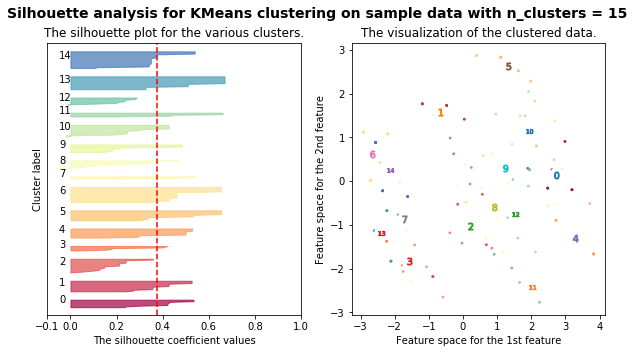

For n_clusters = 16 The average silhouette_score is : 0.38849486059061505


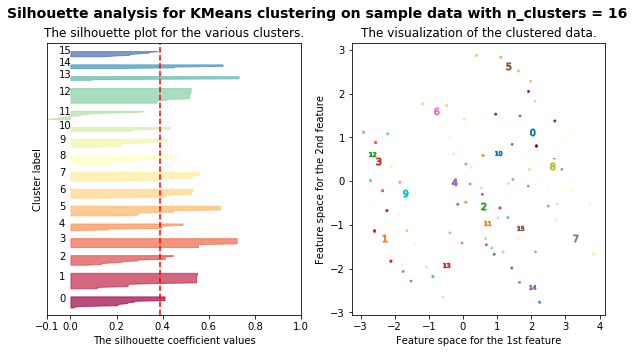

For n_clusters = 17 The average silhouette_score is : 0.37898658248908185


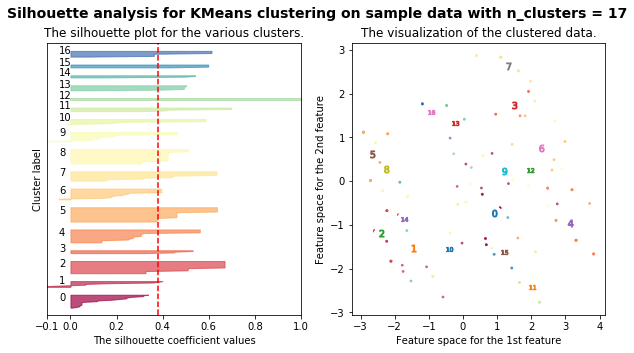

For n_clusters = 18 The average silhouette_score is : 0.3956949462845011


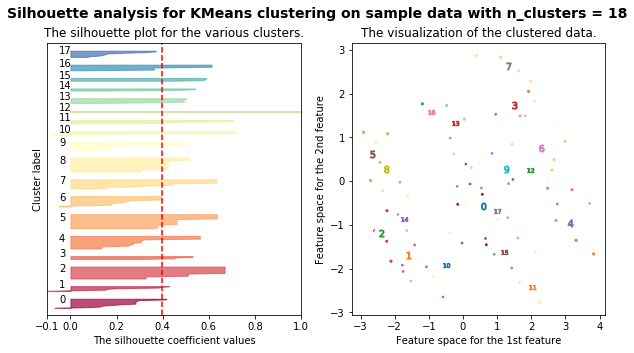

For n_clusters = 19 The average silhouette_score is : 0.4242629500744715


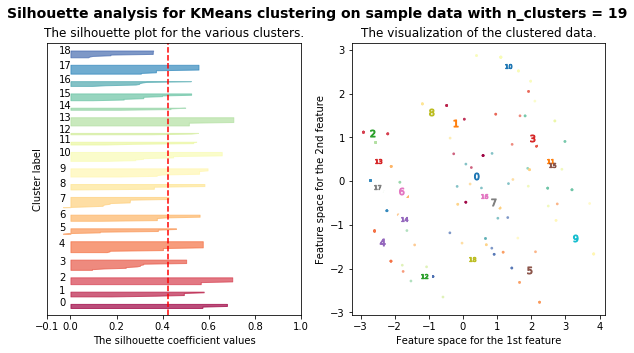

For n_clusters = 20 The average silhouette_score is : 0.43993470229570586


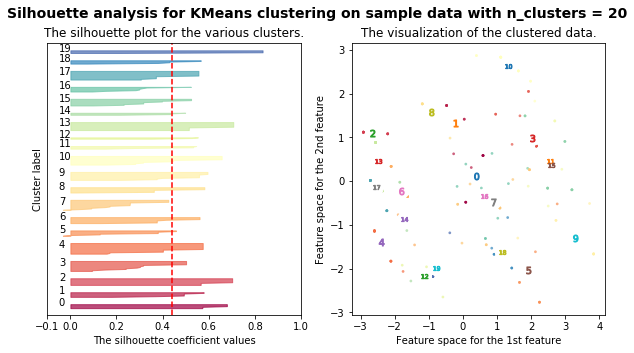

For n_clusters = 21 The average silhouette_score is : 0.4313218269240939


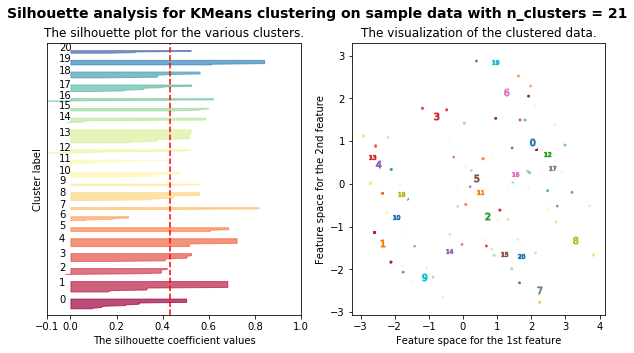

For n_clusters = 22 The average silhouette_score is : 0.4444440218350331


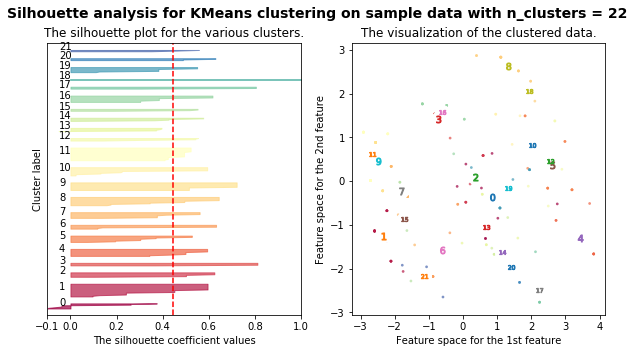

For n_clusters = 23 The average silhouette_score is : 0.46033139105297544


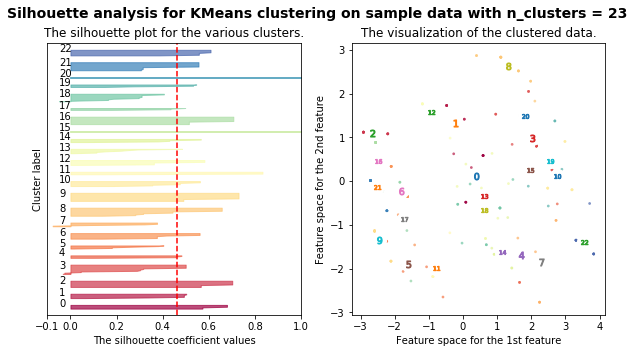

For n_clusters = 24 The average silhouette_score is : 0.4616951415399424


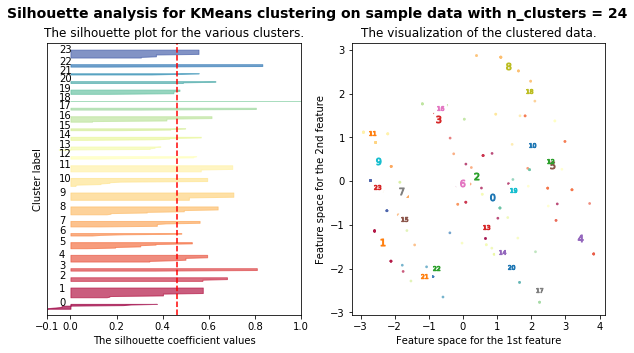

For n_clusters = 25 The average silhouette_score is : 0.47731299145997974


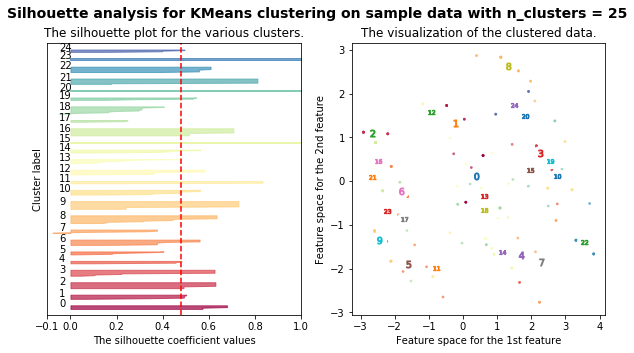

For n_clusters = 26 The average silhouette_score is : 0.4893614285576986


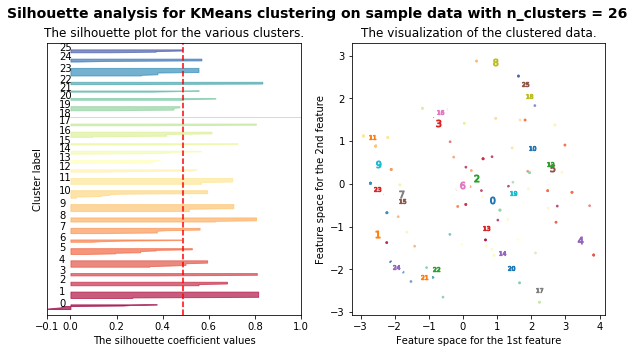

For n_clusters = 27 The average silhouette_score is : 0.4942022171546109


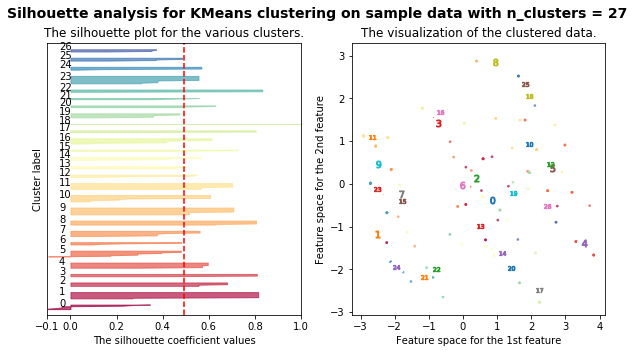

For n_clusters = 28 The average silhouette_score is : 0.5149626675782483


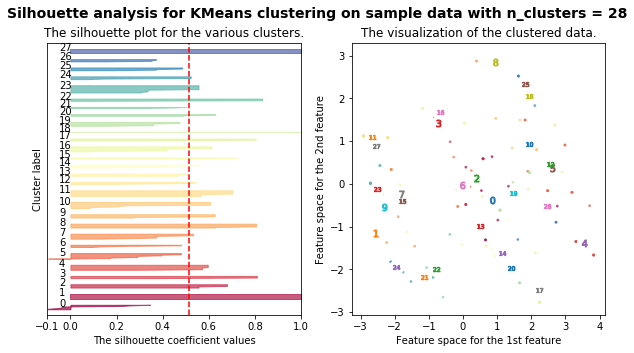

For n_clusters = 29 The average silhouette_score is : 0.5261561028771637


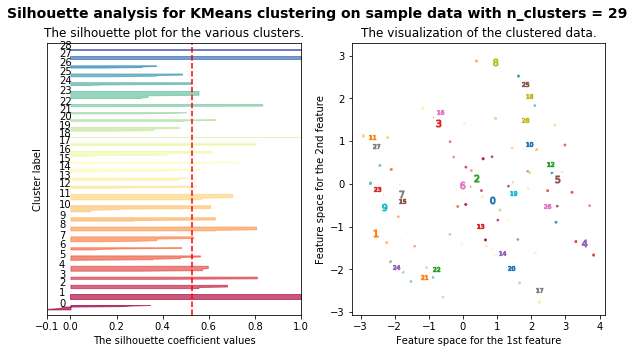

[1046.596046542087, 841.6669266939309, 680.454056414901, 580.5282673722102, 506.7524734462456, 450.2671576877509, 415.209834795656, 372.25414264199765, 344.66438254513474, 320.8019632755508, 294.37794104564387, 277.2933983818684, 258.5743504064717, 241.01293400911803, 230.66308979871474, 220.3660514080924, 205.13704966533743, 185.7329705805535, 173.16366421337204, 164.86695086357517, 156.4123175261505, 147.5379729839898, 141.58689664287377, 134.52445322400447, 126.85277928513828, 119.9843313942255, 114.85490779080857, 107.78767909309522]


In [19]:
wcss = []
for cluster in range(2,30):
    clusterer = KMeans(n_clusters=cluster,init='k-means++', n_init=10, max_iter=300, random_state=0)
    cluster_labels = clusterer.fit_predict(X_train_std_pc)
    optimal_cluster_analysis(X_train_std_pc, cluster, cluster_labels)
    wcss.append(clusterer.inertia_)
    
print(wcss)

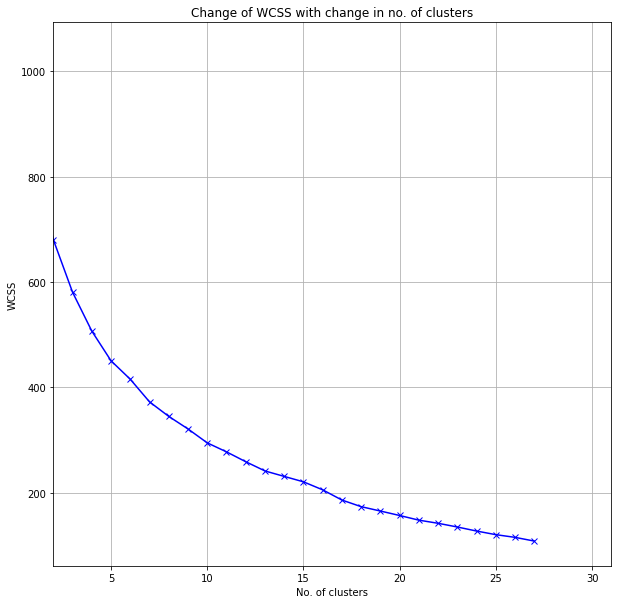

In [20]:
plot_line_chart(wcss, 'No. of clusters', 'WCSS', 2, 31, 'Change of WCSS with change in no. of clusters')

## Select optimal number of clusters and form clusters out of the train data. 

For n_clusters = 24 The average silhouette_score is : 0.4616951415399424


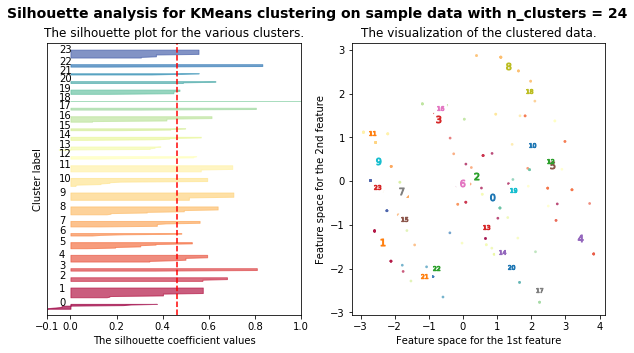

Predicted Clusters (Train Data): 
[16 10  7 16 20  4 23  3 11 23  0 10 10  4 12  2 11 20  1  3 16  4  8  8
  7  3 10 15  4  8  0 22  6  9  4  1  8  8  8  5  0 18 21 10 13 12 11 19
 11  1  5  7  5  6  4  1  5 18 21 17  1 11 11  6  8  0  0  7 10  9 12 15
 11 16 15 23 10 19 11 11  6  0 16 23  9 10  8 20  9 22  1 11  4 16 14 22
 12 14 17  5 23  2 19  7  1  5  0 19  9 11 17 22  7  8 23 23  7  9  1 10
 23  8  8  5 19  5 15 22 13 16  8 14  5  0  1 16 10  2 10  1  1 10 19 12
  9 17  1 16 20  1 19 16 23 23  5 23  9  9  3 19  2 14 21  1  1 13  3 23
  4  7  9 14 13  2  7  4  9 23  2  6  1  9  8  5 10  7  4  8 10 13  1  4
 13  2 14  9  4  0 23]


In [21]:
cluster = 24
clusterer = KMeans(n_clusters=cluster,init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = clusterer.fit_predict(X_train_std_pc)
optimal_cluster_analysis(X_train_std_pc, cluster, cluster_labels)

print('Predicted Clusters (Train Data): ')
print(cluster_labels)

## Create a new column in the train data and populate it with the cluster labels.

In [22]:
X_train['Predicted Cluster'] = list(cluster_labels)
X_train.head(10)

,P_N,P_P,P.1_N,P.1_P,A_N,A_P,A.1_N,A.1_P,A.2_N,A.2_P,P.2_N,P.2_P,Predicted Cluster
108,1,0,1,0,0,0,0,0,0,0,1,0,16
18,0,0,0,0,0,0,0,1,0,1,0,0,10
205,1,0,0,0,1,0,1,0,1,0,0,1,7
15,1,0,1,0,0,0,0,0,0,0,1,0,16
71,0,1,0,0,0,1,0,0,0,0,0,1,20
7,0,1,0,1,0,0,0,1,0,1,0,1,4
228,0,0,0,0,1,0,1,0,1,0,1,0,23
180,1,0,1,0,1,0,0,0,0,0,0,0,3
146,1,0,1,0,1,0,1,0,1,0,1,0,11
160,0,0,1,0,1,0,1,0,1,0,1,0,23


## Transform the test data using the same PCA object that was fit on the train data.

In [23]:
X_test_PCA = pca.transform(X_test)

## Use the same kmeans object, assign cluster labels to the test data and store it as a feature.

For n_clusters = 24 The average silhouette_score is : 0.21669853093579033


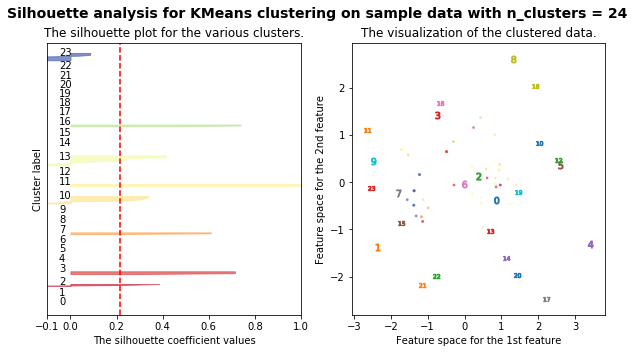

Predicted Clusters (Test Data): 
[23 23 10  3  2 13 13  7 23 11  2  3 13 23  1  7 10 13 15 10 23  0  7 10
 10 23 13 16 13 13 13 13 11 10 13 13 10 16 16 11  3  9 13 23 10  3 23 10
  2 23]


In [24]:
cluster_labels = clusterer.predict(X_test_PCA)
optimal_cluster_analysis(X_test_PCA, cluster, cluster_labels)

print('Predicted Clusters (Test Data): ')
print(cluster_labels)

In [25]:
X_test['Predicted Class'] = list(cluster_labels)
X_test.head(10)

,P_N,P_P,P.1_N,P.1_P,A_N,A_P,A.1_N,A.1_P,A.2_N,A.2_P,P.2_N,P.2_P,Predicted Class
248,0,1,1,0,1,0,1,0,1,0,0,0,23
168,0,0,0,0,1,0,1,0,1,0,1,0,23
76,0,0,0,1,0,0,0,1,0,1,0,1,10
150,1,0,1,0,1,0,0,0,0,0,0,1,3
145,0,0,0,1,1,0,0,0,0,0,1,0,2
73,0,0,0,0,0,0,0,0,0,0,0,1,13
45,0,1,0,0,0,1,0,1,0,1,1,0,13
159,0,0,0,0,1,0,1,0,1,0,0,1,7
218,0,0,0,0,1,0,1,0,1,0,1,0,23
213,1,0,1,0,1,0,1,0,1,0,1,0,11


## Apply SVC model on train dataset and predict target for test dataset.

In [26]:
clf = SVC(kernel='rbf', gamma=0.025, C=3)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

print(y_pred)

['B' 'B' 'NB' 'B' 'B' 'NB' 'NB' 'B' 'B' 'B' 'NB' 'B' 'NB' 'B' 'B' 'B' 'NB'
 'NB' 'B' 'NB' 'B' 'NB' 'B' 'NB' 'NB' 'B' 'NB' 'NB' 'NB' 'NB' 'NB' 'NB'
 'B' 'NB' 'NB' 'NB' 'NB' 'NB' 'NB' 'B' 'B' 'B' 'NB' 'B' 'NB' 'NB' 'B' 'NB'
 'NB' 'B']


## Check accuracy and confusion matrix.

In [27]:
print('The training score: ', clf.score(X_test, y_test))

The training score:  0.98


In [28]:
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[22,  1],
       [ 0, 27]], dtype=int64)

In [29]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           B       1.00      0.96      0.98        23
          NB       0.96      1.00      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

